In [11]:
from py2neo import Graph, NodeSelector
from pandas import DataFrame
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker, style

style.use('ggplot')

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

graph = Graph("http://localhost:7474", password = "admin")

In [2]:
data1 = DataFrame(graph.data("MATCH (n:Subjekt)--(a:Osoba) WITH n, count(distinct(a)) as c RETURN n.ico, c"))

In [3]:
stupen1 = data1["c"].dropna()

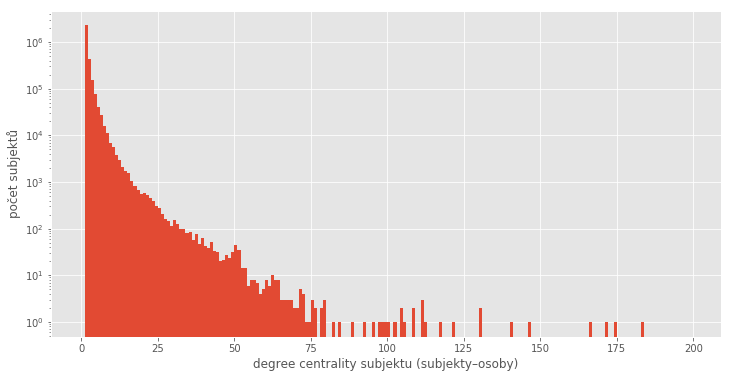

In [12]:
binwidth = 1

fig, axes = plt.subplots()
axes.set_xlabel("degree centrality subjektu (subjekty–osoby)")
axes.set_ylabel("počet subjektů")
axes.set_yscale('log')
axes.hist(stupen1, bins=range(0, 200, binwidth), rwidth=1)
fig.savefig("vystup/subjekty-centralita-osoby.pdf", bbox_inches='tight')

In [5]:
data2 = DataFrame(graph.data("MATCH (n:Subjekt)--(a:Subjekt) WITH n, count(distinct(a)) as c RETURN n.ico, c"))

In [6]:
stupen2 = data2["c"].dropna()

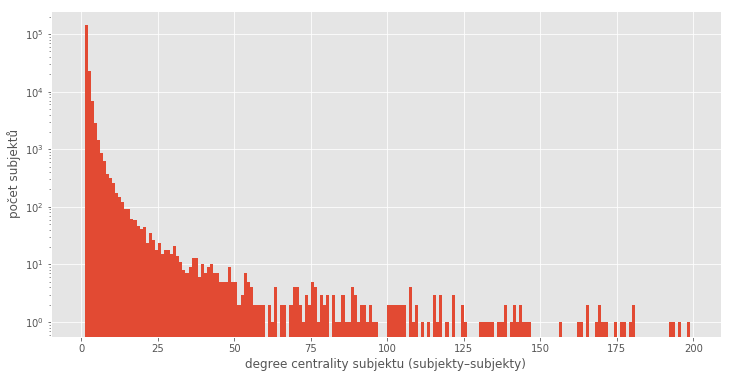

In [13]:
binwidth = 1

fig, axes = plt.subplots()
axes.set_xlabel("degree centrality subjektu (subjekty–subjekty)")
axes.set_ylabel("počet subjektů")
axes.set_yscale('log')
axes.hist(stupen2, bins=range(0, 200, binwidth), rwidth=1)
fig.savefig("vystup/subjekty-centralita-subjekty.pdf", bbox_inches='tight')

In [8]:
data3 = DataFrame(graph.data("MATCH (n:Subjekt)--(a:Smlouva) WITH n, count(distinct(a)) as c RETURN n.ico, c"))

In [9]:
stupen3 = data3["c"].dropna()

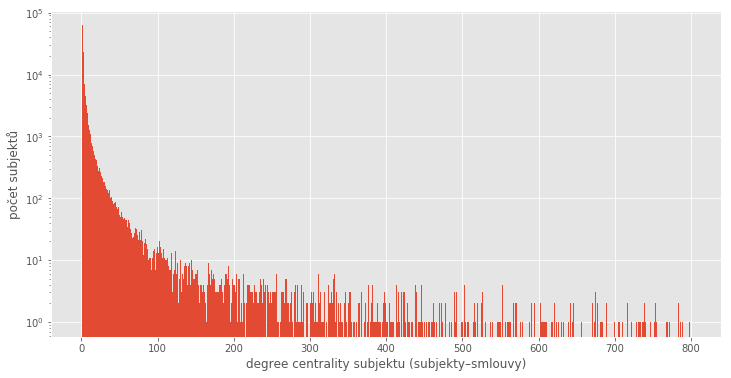

In [14]:
binwidth = 1

fig, axes = plt.subplots()
axes.set_xlabel("degree centrality subjektu (subjekty–smlouvy)")
axes.set_ylabel("počet subjektů")
axes.set_yscale('log')
axes.hist(stupen3, bins=range(0, 800, binwidth), rwidth=1)
fig.savefig("vystup/subjekty-centralita-smlouvy.pdf", bbox_inches='tight')